In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("pengaruh_media_sosial_ipk_mahasiswa.csv", delimiter=";")
df['Nilai IPK'] = df['Nilai IPK'].str.replace(',', '.').astype(float)
df['Nilai_Group'] = df['Nilai IPK'].apply(lambda x: 'Diatas 3' if x >= 3.5 else "Dibawah 3")


In [3]:
# Mengecek dataset
print(df.head()["Nilai IPK"])

0    2.36
1    3.59
2    2.32
3    3.03
4    3.64
Name: Nilai IPK, dtype: float64


In [4]:
# Data fitur
x = df[["Berapa lama Anda menggunakan Media Sosial dalam sehari?","Berapa lama Anda tidur dalam sehari?"]]

# Data target
y = df["Nilai IPK"]

print (x[:5])
print (y[:5])

  Berapa lama Anda menggunakan Media Sosial dalam sehari?  \
0                                   Lebih dari 6 jam        
1                                  Kurang dari 6 jam        
2                                   Lebih dari 6 jam        
3                                   Lebih dari 6 jam        
4                                  Kurang dari 6 jam        

  Berapa lama Anda tidur dalam sehari?  
0                    Kurang dari 8 jam  
1                    Kurang dari 8 jam  
2                    Kurang dari 8 jam  
3                     Lebih dari 8 jam  
4                    Kurang dari 8 jam  
0    2.36
1    3.59
2    2.32
3    3.03
4    3.64
Name: Nilai IPK, dtype: float64


# Membagi dataset antara train dan test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.head(5))
print(y_train.head(5))

    Berapa lama Anda menggunakan Media Sosial dalam sehari?  \
6                                    Kurang dari 6 jam        
183                                  Kurang dari 6 jam        
185                                   Lebih dari 6 jam        
146                                   Lebih dari 6 jam        
30                                   Kurang dari 6 jam        

    Berapa lama Anda tidur dalam sehari?  
6                      Kurang dari 8 jam  
183                    Kurang dari 8 jam  
185                    Kurang dari 8 jam  
146                     Lebih dari 8 jam  
30                     Kurang dari 8 jam  
6      3.18
183    2.58
185    2.67
146    2.18
30     2.10
Name: Nilai IPK, dtype: float64


In [7]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
encoder = OrdinalEncoder()
le = LabelEncoder()

# Fitur
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)



# Target
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train[:5], "\n")
print(y_train[:5])



[[0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]] 

[[78]
 [33]
 [40]
 [ 7]
 [ 0]]


In [8]:
# Train data
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
report = classification_report(y_train, y_pred)
print("Train data")
print(report)

Train data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17    

C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score a

In [9]:
# Test data
model = BernoulliNB()
model.fit(X_test, y_test)

# prediksi
y_pred = model.predict(X_test)

# menghitung akurasi data test
accuracy = model.score(X_test, y_test)
print("Accuracy of BernoulliNB: {:.2f}%".format(accuracy * 100))



Accuracy of BernoulliNB: 6.67%


C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
report = classification_report(y_test, y_pred)
print("Test Model")
print(report)

Test Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.05      1.00      0.09         2
          15       0.00      0.00      0.00         1
          16       0.11      1.00      0.20         2
          17    

C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\haika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471

# Visualization

<Axes: xlabel='Durasi Penggunaan Media Sosial'>

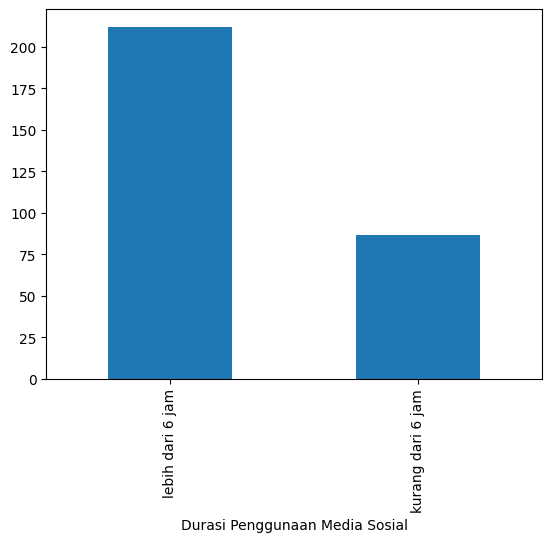

In [15]:
# Ubah data dalam kolom "Berapa lama Anda menggunakan Media Sosial dalam sehari?" menjadi kategori
df['Berapa lama Anda menggunakan Media Sosial dalam sehari?'] = df['Berapa lama Anda menggunakan Media Sosial dalam sehari?'].replace({'Lebih dari 6 jam': 7, 'Kurang dari 6 jam': 5})


df['Durasi Penggunaan Media Sosial'] = pd.cut(df['Berapa lama Anda menggunakan Media Sosial dalam sehari?'], 
                                             bins=[0, 6, df['Berapa lama Anda menggunakan Media Sosial dalam sehari?'].max()], 
                                             labels=['kurang dari 6 jam', 'lebih dari 6 jam'])

df['Pengaruh Media Sosial'] = df['Durasi Penggunaan Media Sosial'].astype(str) + ' - ' + df['Nilai IPK'].astype(str)

df['Durasi Penggunaan Media Sosial'].value_counts().plot(kind='bar')


# GAK KEPAKE

C:\Users\haika\AppData\Local\Temp\ipykernel_6108\2972373962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Durasi Penggunaan Media Sosial', 'Nilai_Group']).size().reset_index(name='Jumlah')


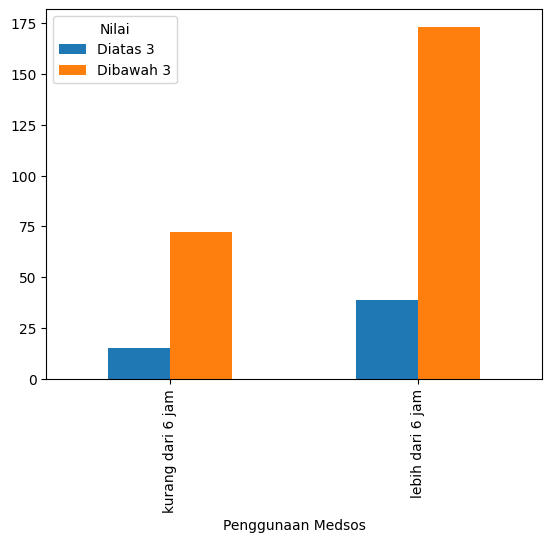

In [12]:
grouped_df = df.groupby(['Durasi Penggunaan Media Sosial', 'Nilai_Group']).size().reset_index(name='Jumlah')

grouped_df = grouped_df.rename(columns={
    'Durasi Penggunaan Media Sosial': 'Penggunaan Medsos',
    'Nilai_Group' : 'Nilai'
    })
pivot_df = grouped_df.pivot(index='Penggunaan Medsos', columns='Nilai', values='Jumlah')
pivot_df.plot(kind='bar')
plt.show()

In [13]:
counts = df['Nilai IPK'].value_counts()
print(counts)
print(df.columns)

Nilai IPK
3.33    7
3.04    7
2.68    6
2.87    5
3.01    5
       ..
2.88    1
3.49    1
3.24    1
2.33    1
3.02    1
Name: count, Length: 136, dtype: int64
Index(['No', 'Nama :', 'Jenis Kelamin :', 'Tingkat Semester :',
       'Program Studi/Jurusan :',
       'Berapa lama Anda menggunakan Media Sosial dalam sehari?',
       'Berapa lama Anda tidur dalam sehari?',
       'Apakah Anda merasa prestasi akademik (IPK) Anda baik?',
       'Apakah penggunaan Media Sosial dapat mempengaruhi prestasi akademik Anda?',
       'Platform Media Sosial apa yang paling sering Anda gunakan?',
       'Apakah penggunaan Media Sosial berpengaruh terhadap jam tidur Anda?',
       'Nilai IPK', 'Nilai_Group', 'Durasi Penggunaan Media Sosial',
       'Pengaruh Media Sosial'],
      dtype='object')


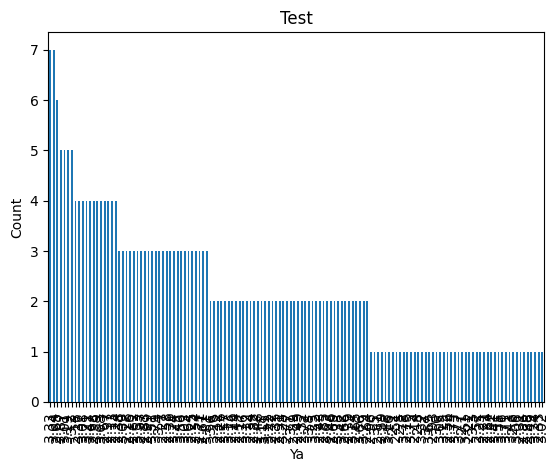

In [14]:

counts.plot(kind='bar')
# plt.bar(range(len(counts)), counts)
plt.xlabel('Ya')
plt.ylabel('Count')
plt.title('Test')
plt.show()